<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


---

In [1]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datos/autorenew_knn.csv', index_col=0)

# Por si acaso, aunque no hace nada aquí
df.reset_index(drop=True, inplace=True)

In [3]:
df.select_dtypes(include=np.number).columns

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration'],
      dtype='object')

Tenemos un problema. Pandas carga de nuevo el csv infiriendo el tipo de dato, por lo que `monthOfRegistration` los tenemos que convertir de nuevo a object.

In [4]:
df['monthOfRegistration'] = df['monthOfRegistration'].astype(object)

In [5]:
df.select_dtypes(include=np.number).columns

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer'], dtype='object')

Comprobamos de nuevo que solo hay nulos en la variable respuesta:

In [6]:
df.select_dtypes(include=np.number).isna().sum()

price                 18033
yearOfRegistration        0
powerCV                   0
kilometer                 0
dtype: int64

Ya estamos listos para llevar a cabo la estandarización de las variables numéricas predictoras

---

Vamos a utilizar un `RobustScaler` ya que queremos tener en cuenta los outliers

In [7]:
# Lista de variables predictoras
lista_variables_predictoras = ['yearOfRegistration', 'powerCV', 'kilometer']

# Elección del método de reescalado
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[lista_variables_predictoras])

# Creamos una copia para comparar
df_raw = df.copy()
df[lista_variables_predictoras] = datos_transf_robust

In [8]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
price,334454.0,6238.561695,18671.609473,250.0,1350.0,3200.0,7500.0,3895000.0
yearOfRegistration,352487.0,2002.671452,7.314566,1910.0,1999.0,2003.0,2007.0,2016.0
powerCV,352487.0,124.419820,61.102398,10.0,85.0,114.0,148.0,1299.0
kilometer,352487.0,125618.576004,40067.294497,5000.0,125000.0,150000.0,150000.0,150000.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,334454.0,6238.561695,18671.609473,250.000000,1350.000000,3200.0,7500.000000,3.895000e+06
yearOfRegistration,352487.0,-0.041069,0.914321,-11.625000,-0.500000,0.0,0.500000,1.625000e+00
powerCV,352487.0,0.165394,0.969879,-1.650794,-0.460317,0.0,0.539683,1.880952e+01
kilometer,352487.0,-0.975257,1.602692,-5.800000,-1.000000,0.0,0.000000,0.000000e+00


Vemos que se han estandarizado las variables. Pero vamos a verlo mejor gráficamente

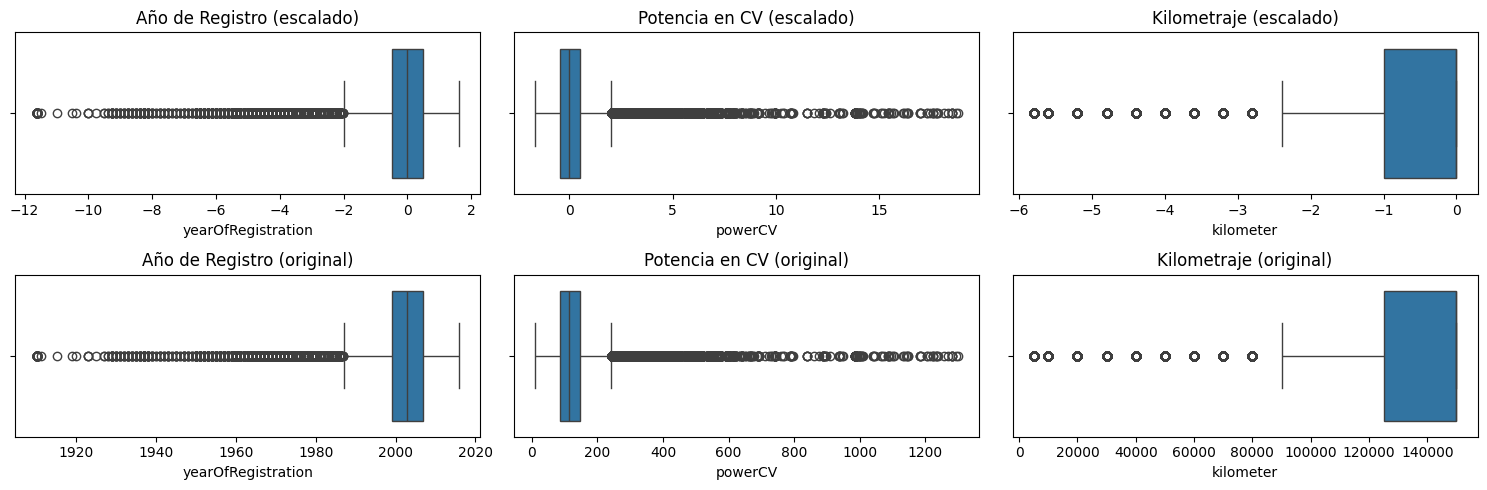

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

# Gráficos escalados
sns.boxplot(x="yearOfRegistration", data=df, ax=axes[0][0])
axes[0][0].set_title("Año de Registro (escalado)")

sns.boxplot(x="powerCV", data=df, ax=axes[0][1])
axes[0][1].set_title("Potencia en CV (escalado)")

sns.boxplot(x="kilometer", data=df, ax=axes[0][2])
axes[0][2].set_title("Kilometraje (escalado)")

# Segunda fila de gráficos
sns.boxplot(x="yearOfRegistration", data=df_raw, ax=axes[1][0])
axes[1][0].set_title("Año de Registro (original)")

sns.boxplot(x="powerCV", data=df_raw, ax=axes[1][1])
axes[1][1].set_title("Potencia en CV (original)")

sns.boxplot(x="kilometer", data=df_raw, ax=axes[1][2])
axes[1][2].set_title("Kilometraje (original)")

plt.tight_layout()
plt.show()

Vemos que efectivamente los hemos escalado a la mediana manteniendo su distribución, gracias al reescalado de forma robusta.

Simplemente vamos a guardar el dataframe en csv.

In [11]:
df.to_csv('datos/autorenew_knn_escalado.csv')